#### Suppress sklearn's Future Warnings

In [1]:
# reference: https://stackoverflow.com/questions/32612180/eliminating-warnings-from-scikit-learn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
import copy

### Load dataset

In [3]:
dataset = pd.read_csv("CO2 Emissions.csv")
print(f"Number of samples: {len(dataset)}")
dataset.head()

Number of samples: 7385


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Split dataset

In [4]:
df, df_test = train_test_split(dataset, train_size=0.8, random_state=420)
print(len(df), len(df_test))
df.head()

5908 1477


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1729,KIA,SEDONA SXL,MINIVAN,3.3,6,AS6,X,14.2,10.5,12.5,23,288
3058,MITSUBISHI,OUTLANDER,SUV - SMALL,2.4,4,AV6,X,9.2,7.5,8.4,34,193
3441,BMW,X4 M40i,SUV - SMALL,3.0,6,AS8,Z,12.7,9.1,11.1,25,260
2794,JEEP,CHEROKEE FFV,SUV - SMALL,2.4,4,A9,E,15.2,10.2,12.9,22,213
6988,JAGUAR,F-TYPE R AWD Convertible,TWO-SEATER,5.0,8,AS8,Z,15.2,9.8,12.7,22,299


## A

### Data Analysis

#### Correlation matrix
Represents how each feature relates to every other feature in a visual matrix.

<AxesSubplot:>

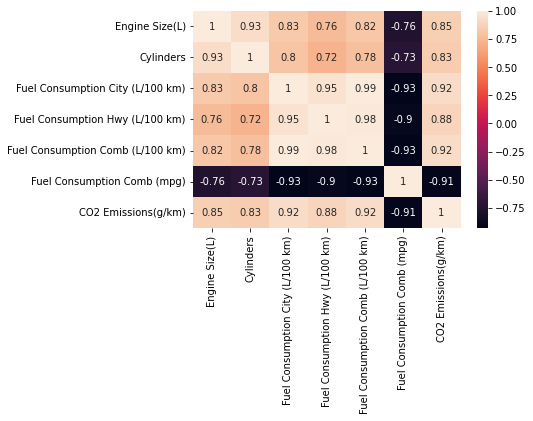

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Observations:**
- The numerical features show a generally strong correlation with each other. Performing PCA should be effective for this dataset.
- The three fuel consumption features naturally have a very high degree of correlation with each other.
- The least correlation between a feature and the target variable is displayed by #cylinders. This is perhaps due to its discrete nature, and its limited range (the same #cylinders can have a very wide range of CO2 emmissions).
- Fuel efficiency is strongly inversely correlated with our target varibales (as well as the other features).

#### Pair plot
Visually displays the relation between variables in the form of scatterplots. 

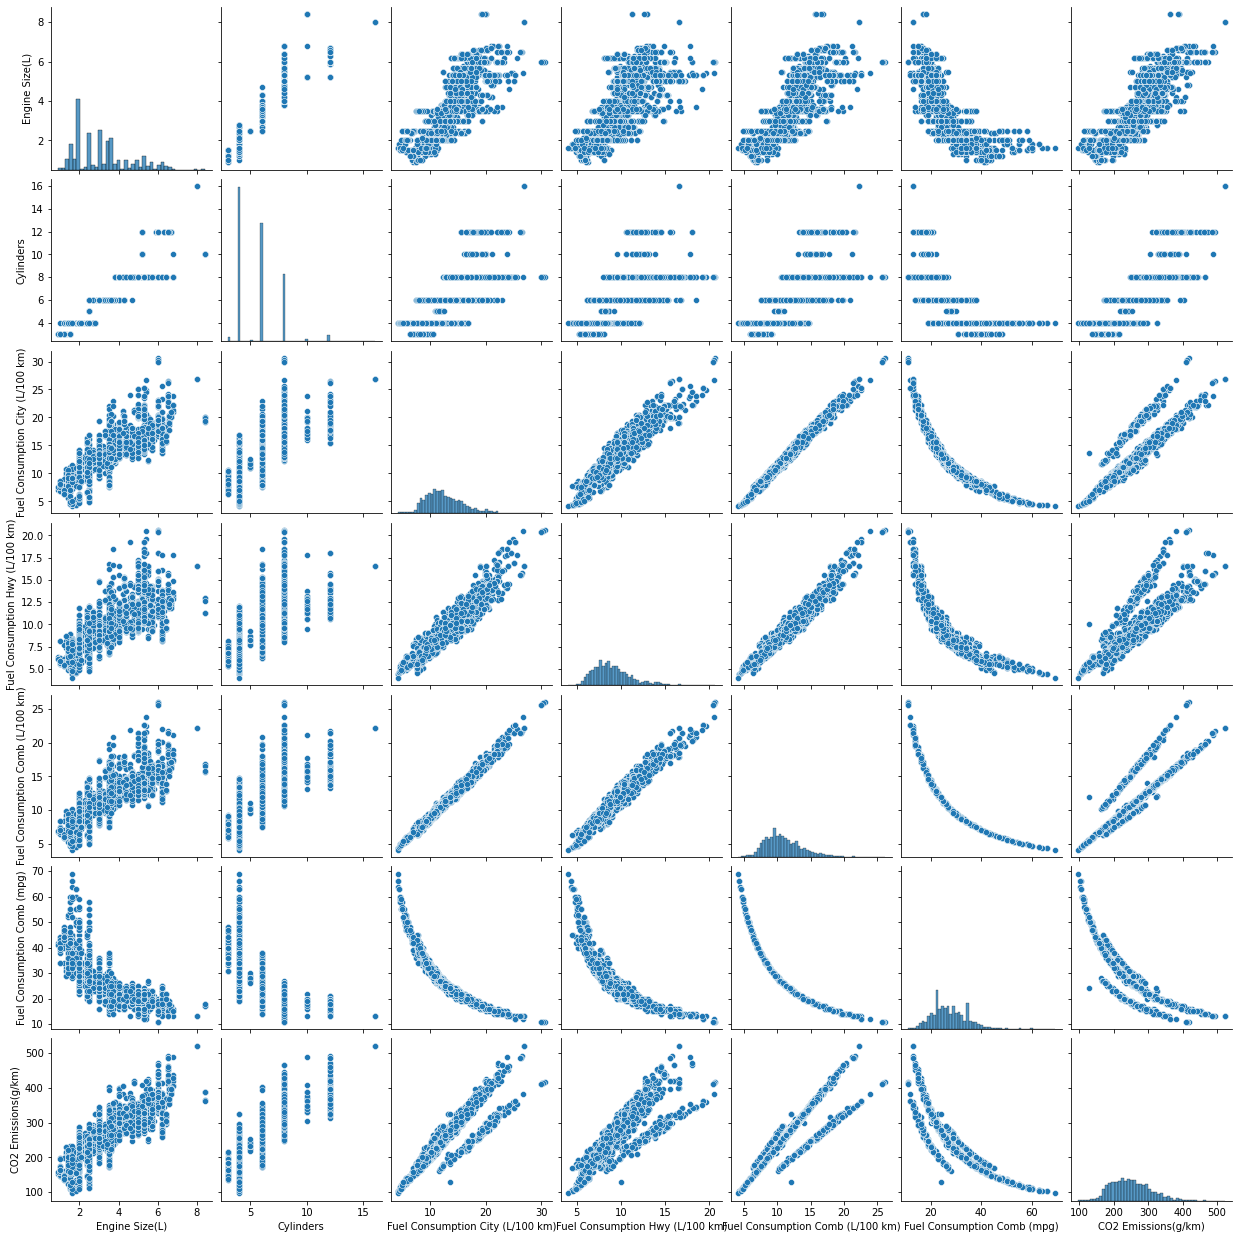

In [6]:
sns.pairplot(df)

**Observations:**
- Most features display a somewhat normal distribution of their values.
- Visualises our observations from the correlation heatmap:
  - Most features show a strong, linear correlation with our target variable.
  - Although #Cylinders does follow a largely increasing pattern, it illustrates the wide range each value #Cylinders can take for the target variable.

### Boxplot
Visualises distribution of our target variable

<AxesSubplot:>

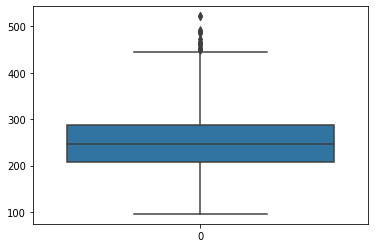

In [7]:
sns.boxplot(df['CO2 Emissions(g/km)'], whis=2)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

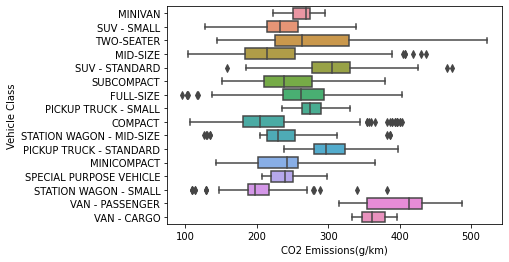

In [8]:
sns.boxplot(df, y='Vehicle Class', x='CO2 Emissions(g/km)', whis=2)

**Observations:**
- Two-Seaters have the widest range of emissions.
- Had the data followed a more regular pattern and had lower variance for each vehicle class, it may have been worth encoding vehicle class labels in ascending order of median emissions. This does not seem to be true here, and one hot encoding will probably show better results.

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Type'>

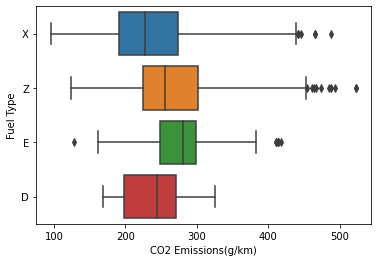

In [9]:
sns.boxplot(df, y='Fuel Type', x='CO2 Emissions(g/km)', whis=2)

### Split features and target

In [10]:
y_train = df['CO2 Emissions(g/km)']
y_test = df_test['CO2 Emissions(g/km)']

df = df.drop(columns=['CO2 Emissions(g/km)'])
df_test = df_test.drop(columns=['CO2 Emissions(g/km)'])

## B

### T-SNE

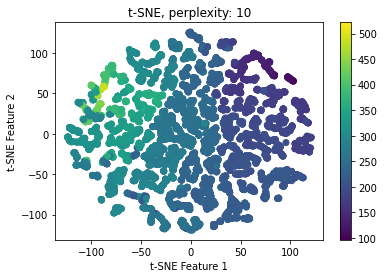

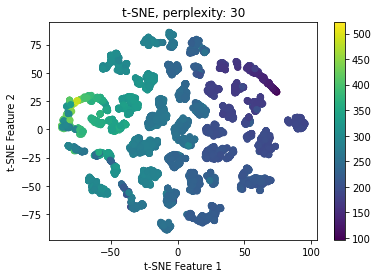

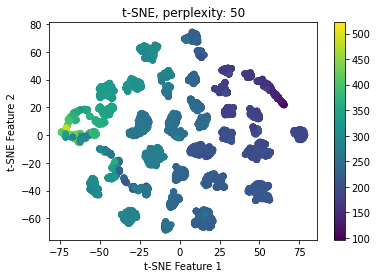

In [11]:
for p in [10, 30, 50]:
    df_tsne = df.drop(columns=["Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"])
    tsne = TSNE(perplexity=p, random_state=42) #default n_components is 2, perpexity is 30
    df_tsne = tsne.fit_transform(df_tsne)

    plt.scatter(x=df_tsne[:,0], y=df_tsne[:,1], c=y_train)
    plt.title(f"t-SNE, perplexity: {p}")
    plt.xlabel("t-SNE Feature 1")
    plt.ylabel("t-SNE Feature 2")
    plt.colorbar()
    plt.show()

#### Observations:
Through the range of perplexities, the dataset does not seem to demonstrate any significant separability, although it increases in proportion to perplexity. In general, greater values of the target correspond to greater values of t-SNE Feature 2, and lower values of t-SNE feature 1.

## C

### Pre-Processing

#### Create new dataframes

In [12]:
df_c = df.copy()
df_test_c = df_test.copy()

#### Drop missing values

In [13]:
df_c.dropna(axis=0)
df_test_c.dropna(axis=0)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
7364,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,AM7,X,9.7,7.5,8.7,32
6704,CHEVROLET,Silverado,PICKUP TRUCK - STANDARD,4.3,6,A6,X,15.1,11.5,13.5,21
1027,VOLKSWAGEN,BEETLE CONVERTIBLE,SUBCOMPACT,1.8,4,A6,X,9.8,7.3,8.7,32
5717,DODGE,Charger AWD FFV,FULL-SIZE,3.6,6,A8,X,12.8,8.7,11.0,26
1531,GMC,SAVANA 3500 PASSENGER,VAN - PASSENGER,4.8,8,A6,X,21.3,14.3,18.1,16
...,...,...,...,...,...,...,...,...,...,...,...
3046,MINI,JOHN COOPER WORKS COUNTRYMAN ALL4,COMPACT,1.6,4,M6,Z,9.4,7.6,8.6,33
4832,GMC,SIERRA 4WD,PICKUP TRUCK - STANDARD,6.2,8,A8,Z,16.0,11.7,14.1,20
4751,FORD,F-150 4X4,PICKUP TRUCK - STANDARD,5.0,8,AS10,X,14.6,10.9,13.0,22
1078,ACURA,TLX,COMPACT,2.4,4,AM8,Z,9.6,6.6,8.3,34


#### Perform label encoding

In [14]:
encoders = {
    'Make':LabelEncoder(),
    'Model':LabelEncoder(),
    'Vehicle Class':LabelEncoder(),
    'Transmission':LabelEncoder(),
    'Fuel Type':LabelEncoder()
}

for column_name in list(encoders.keys()):    
    encoders[column_name].fit(dataset[column_name])
    df_c[column_name] = encoders[column_name].transform(df_c[column_name])
    df_test_c[column_name] = encoders[column_name].transform(df_test_c[column_name])

In [15]:
df_c.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
1729,21,1637,4,3.3,6,15,3,14.2,10.5,12.5,23
3058,30,1333,11,2.4,4,21,3,9.2,7.5,8.4,34
3441,5,1929,11,3.0,6,17,4,12.7,9.1,11.1,25
2794,20,492,11,2.4,4,6,1,15.2,10.2,12.9,22
6988,19,883,13,5.0,8,17,4,15.2,9.8,12.7,22


#### Scale the dataset

In [16]:
scaler = StandardScaler() #Standardises the data by centering it and subsequently dividing it by the std
df_c = scaler.fit_transform(df_c)
df_test_c = scaler.transform(df_test_c)

### Perform Linear Regression

In [17]:
regressor = LinearRegression(n_jobs=-1)

regressor.fit(df_c, y_train)

LinearRegression(n_jobs=-1)

#### Generate predictions

In [18]:
y_train_predictions = regressor.predict(df_c)
y_test_predictions = regressor.predict(df_test_c)

##### R2 Score

In [19]:
trainR2_c = r2_score(y_train, y_train_predictions)
testR2_c = r2_score(y_test, y_test_predictions)

print(f"Train R2 Score: {trainR2_c}")
print(f"Test R2 Score: {testR2_c}")

Train R2 Score: 0.9169059819884969
Test R2 Score: 0.912167981020966


##### Adjusted R2 Score

In [20]:
def adjR2(X, r2Score):
    #reference: https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2
    
    n = X.shape[0] #number of samples
    p = X.shape[1] #number of independent variables. We assume they're all independent, although they probably aren't.
    adjR2Score = 1 - (1-r2Score)*(n-1)/(n-p-1)

    return adjR2Score

In [21]:
print(f"Train Adjusted R2 Score: {adjR2(df_c, trainR2_c)}")
print(f"Test Adjusted R2 Score: {adjR2(df_test_c, testR2_c)}")

Train Adjusted R2 Score: 0.9167509558354904
Test Adjusted R2 Score: 0.9115084914586661


##### MSE

In [22]:
trainMSE_c = mean_squared_error(y_train, y_train_predictions)
testMSE_c = mean_squared_error(y_test, y_test_predictions)

print(f"Train Mean Squared Error: {trainMSE_c}")
print(f"Test Mean Squared Error: {testMSE_c}")

Train Mean Squared Error: 282.1071106446571
Test Mean Squared Error: 310.5692053430737


##### RMSE

In [23]:
def rmseCalc(X, MSE):
    #reference: https://c3.ai/glossary/data-science/root-mean-square-error-rmse/#:~:text=To%20compute%20RMSE%2C%20calculate%20the,square%20root%20of%20that%20mean.
    
    n = X.shape[0]
    return (MSE/n)**0.5

In [24]:
print(f"Train Root Mean Squared Error: {rmseCalc(df_c, trainMSE_c)}")
print(f"Test Root Mean Squared Error: {rmseCalc(df_test_c, testMSE_c)}")

Train Root Mean Squared Error: 0.21851777668633254
Test Root Mean Squared Error: 0.45855237564233226


##### MAE

In [25]:
trainMAE_c = mean_absolute_error(y_train, y_train_predictions)
testMAE_c = mean_absolute_error(y_test, y_test_predictions)

print(f"Train Mean Absolute Error: {trainMAE_c}")
print(f"Test Mean Absolute Error: {testMAE_c}")

Train Mean Absolute Error: 11.024542313726075
Test Mean Absolute Error: 11.358394188049402


## D

#### PCA

In [26]:
train_r2Scores = []
train_adjR2Scores = []
train_MSEs = []
train_RMSEs = []
train_MAEs = []

test_r2Scores = []
test_adjR2Scores = []
test_MSEs = []
test_RMSEs = []
test_MAEs = []

In [27]:
for numComponents in [4, 6, 8, 10]:
    print(f"Number of components: {numComponents}")

    #initialise PCA
    pca = PCA(n_components=numComponents)

    #clone pre-processed dataset
    df_d = copy.deepcopy(df_c)
    df_test_d = copy.deepcopy(df_test_c)

    #perform PCA
    df_d = pca.fit_transform(df_d)
    df_test_d = pca.transform(df_test_d)

    #perform linear regression
    regressor = LinearRegression(n_jobs=-1)
    regressor.fit(df_d, y_train)

    #Generate predictions
    y_train_predictions = regressor.predict(df_d)
    y_test_predictions = regressor.predict(df_test_d)

    #Measure performance
    trainR2 = r2_score(y_train, y_train_predictions)
    testR2 = r2_score(y_test, y_test_predictions)
    trainMSE = mean_squared_error(y_train, y_train_predictions)
    testMSE = mean_squared_error(y_test, y_test_predictions)
    trainMAE = mean_absolute_error(y_train, y_train_predictions)
    testMAE = mean_absolute_error(y_test, y_test_predictions)

    print(f"Train R2 Score: {trainR2}")
    print(f"Train Adjusted R2 Score: {adjR2(df_c, trainR2)}")
    print(f"Train Mean Squared Error: {trainMSE}")
    print(f"Train Root Mean Squared Error: {rmseCalc(df_c, trainMSE)}")
    print(f"Train Mean Absolute Error: {trainMAE}")
    print()

    print(f"Test R2 Score: {testR2}")
    print(f"Test Adjusted R2 Score: {adjR2(df_test_c, testR2)}")
    print(f"Test Mean Squared Error: {testMSE}")
    print(f"Test Root Mean Squared Error: {rmseCalc(df_test_c, testMSE)}") 
    print(f"Test Mean Absolute Error: {testMAE}")

    print('-'*32)
    print()

    #Store values
    train_r2Scores.append(trainR2)
    train_adjR2Scores.append(adjR2(df_c, trainR2))
    train_MSEs.append(trainMSE)
    train_RMSEs.append(rmseCalc(df_c, trainMSE))
    train_MAEs.append(trainMAE)

    test_r2Scores.append(testR2)
    test_adjR2Scores.append(adjR2(df_test_c, testR2))
    test_MSEs.append(testMSE)
    test_RMSEs.append(rmseCalc(df_test_c, testMSE))
    test_MAEs.append(testMAE)


Number of components: 4
Train R2 Score: 0.9116393802913234
Train Adjusted R2 Score: 0.9114745283888819
Train Mean Squared Error: 299.98740844780565
Train Root Mean Squared Error: 0.22533635749573522
Train Mean Absolute Error: 11.703608155956731

Test R2 Score: 0.9078095273840214
Test Adjusted R2 Score: 0.9071173122312735
Test Mean Squared Error: 325.98045853165837
Test Root Mean Squared Error: 0.469791911851624
Test Mean Absolute Error: 12.04553653603219
--------------------------------

Number of components: 6
Train R2 Score: 0.9129089437489429
Train Adjusted R2 Score: 0.9127464604350417
Train Mean Squared Error: 295.67719590326953
Train Root Mean Squared Error: 0.2237116866367485
Train Mean Absolute Error: 11.691695781395627

Test R2 Score: 0.9085262443249061
Test Adjusted R2 Score: 0.9078394106645471
Test Mean Squared Error: 323.44618670944743
Test Root Mean Squared Error: 0.46796219568900443
Test Mean Absolute Error: 12.060723532057041
--------------------------------

Number of co

#### Compare results

In [28]:
results_d = pd.DataFrame()
results_d['n_components'] = [4, 6, 8, 10]

results_d['train_r2Scores'] = train_r2Scores
results_d['train_adjR2Scores'] = train_adjR2Scores
results_d['train_MSEs'] = train_MSEs
results_d['train_RMSEs'] = train_RMSEs
results_d['train_MAEs'] = train_MAEs

results_d['test_r2Scores'] = test_r2Scores
results_d['test_adjR2Scores'] = test_adjR2Scores
results_d['test_MSEs'] = test_MSEs
results_d['test_RMSEs'] = test_RMSEs
results_d['test_MAEs'] = test_MAEs

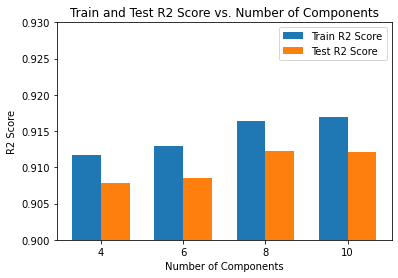

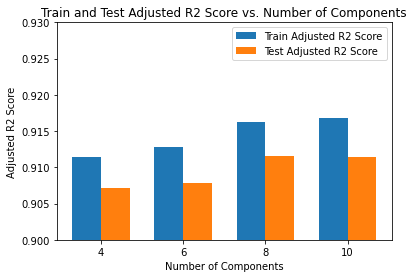

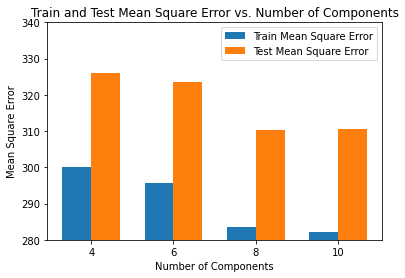

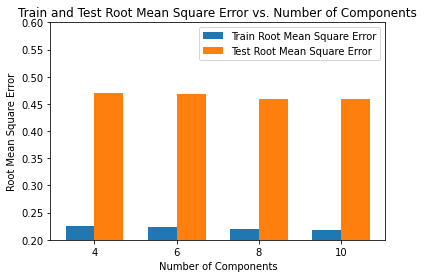

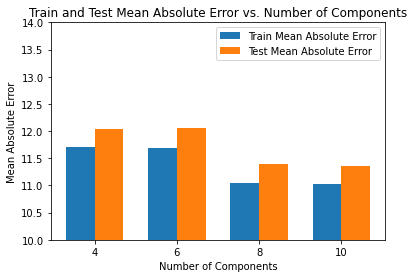

In [29]:
#reference: ChatGPT, https://chat.openai.com/share/d1e4998a-bbfa-4655-a671-9688967bd233

perfMeasures_train = ['train_r2Scores', 'train_adjR2Scores', 'train_MSEs', 'train_RMSEs', 'train_MAEs']
perfMeasures_test = ['test_r2Scores', 'test_adjR2Scores', 'test_MSEs', 'test_RMSEs', 'test_MAEs']
titles = ['R2 Score', 'Adjusted R2 Score', 'Mean Square Error', 'Root Mean Square Error', 'Mean Absolute Error']

for i in range(5):
    # Set the positions of the bars on the x-axis
    x = results_d['n_components']
    bar_width = 0.35

    # Set the index for the x-axis positions
    x_indexes = range(len(x))

    # Create a figure and axis for the bar graph
    fig, ax = plt.subplots()

    # Plot the train R2 scores as bars
    train_bars = ax.bar(range(len(x)), results_d[perfMeasures_train[i]], bar_width, label=f'Train {titles[i]}')

    # Plot the test R2 scores as bars, shifted by 'bar_width' to the right
    test_bars = ax.bar([i + bar_width for i in x_indexes], results_d[perfMeasures_test[i]], bar_width, label=f'Test {titles[i]}')

    # Set labels and title
    if (i<2): ax.set_ylim(0.9, 0.93)
    if (i==2): ax.set_ylim(280, 340)
    if (i==3): ax.set_ylim(0.2, 0.6)
    if (i==4): ax.set_ylim(10, 14)
    ax.set_xlabel('Number of Components')
    ax.set_ylabel(f'{titles[i]}')
    ax.set_title(f'Train and Test {titles[i]} vs. Number of Components')
    ax.set_xticks([i + bar_width / 2 for i in x_indexes])
    ax.set_xticklabels(x)
    ax.legend()

    # Show the plot
    plt.show()

#### Observations
n_components = 10 seems to perform the best overall.

## E

### Duplicate original dataset

In [30]:
dataset_e = dataset.copy()
dataset_e.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Drop missing values

In [31]:
dataset_e.dropna(axis=0)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


### One Hot Encoding

In [32]:
df_e, df_test_e = train_test_split(pd.get_dummies(dataset, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']), train_size=0.8, random_state=420)

In [33]:
df_e

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
1729,3.3,6,14.2,10.5,12.5,23,288,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3058,2.4,4,9.2,7.5,8.4,34,193,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3441,3.0,6,12.7,9.1,11.1,25,260,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2794,2.4,4,15.2,10.2,12.9,22,213,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6988,5.0,8,15.2,9.8,12.7,22,299,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,1.6,4,9.2,7.1,8.3,34,194,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4671,3.6,6,12.7,9.6,11.3,25,265,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4486,3.0,6,13.5,9.9,11.9,24,280,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5192,2.0,4,9.3,7.3,8.4,34,197,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### Scale dataset

In [34]:
#reference: https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

scaler_2 = ColumnTransformer([
        ('somename', StandardScaler(), ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)'])
    ], remainder='passthrough')

# # scaler_2 = StandardScaler()
scaler_2.fit(df_e)
df_e = scaler_2.transform(df_e)
df_test_e = scaler_2.transform(df_test_e)

#### Linear Regression

In [35]:
regressor_e = LinearRegression(n_jobs=-1)

regressor_e.fit(df_e, y_train)

LinearRegression(n_jobs=-1)

#### Generate predictions

In [36]:
y_train_predictions_e = regressor_e.predict(df_e)
y_test_predictions_e = regressor_e.predict(df_test_e)

In [37]:
#view coefficients
print(list(regressor_e.coef_))
print(df_e.shape)
print(df_test_e.shape)

[-2.0728908880076208e-13, 1.6342482922482304e-13, -3.0636257419836e-13, -1.1884070116874312e-13, 3.8326286588841185e-13, -1.976543928527974e-14, 0.9999999999999993, 1.060818248054137e-05, 1.7179490962994305e-05, 1.4172491537324527e-05, 5.4291805996063876e-06, -2.513763078060803e-05, 2.1065529096902375e-06, 3.262668991388929e-05, 1.1712834212759511e-05, 1.1518597669324154e-05, 5.672008422177746e-06, 3.420092570327322e-05, -2.1048679471537268e-05, -9.072597472525824e-06, 2.9079118989917743e-06, 4.423065208286267e-05, 2.351392879238411e-06, 5.562151818860189e-06, -2.4161621414769876e-06, 5.515852524805298e-06, 6.615861807762486e-06, 6.323402845165131e-06, 1.1434835482247675e-05, -5.760870892522062e-05, 7.39914360673756e-06, -3.5816385009523107e-06, 1.2971496670104968e-05, 2.9722643203265644e-05, -3.1519104101748307e-06, -7.3163353570199815e-06, 6.161781733394784e-06, 1.102481239234645e-05, 3.6401786943160842e-06, -3.069295640134844e-07, -7.452345015846563e-06, -2.2064734910394663e-06, -4.

#### Measure performance

In [38]:
trainR2_e = r2_score(y_train, y_train_predictions_e)
testR2_e = r2_score(y_test, y_test_predictions_e)
trainMSE_e = mean_squared_error(y_train, y_train_predictions_e)
testMSE_e = mean_squared_error(y_test, y_test_predictions_e)
trainMAE_e = mean_absolute_error(y_train, y_train_predictions_e)
testMAE_e = mean_absolute_error(y_test, y_test_predictions_e)

print(f"Train R2 Score: {trainR2_e}")
print(f"Train Adjusted R2 Score: {adjR2(df_e, trainR2_e)}")
print(f"Train Mean Squared Error: {trainMSE_e}")
print(f"Train Root Mean Squared Error: {rmseCalc(df_e, trainMSE_e)}")
print(f"Train Mean Absolute Error: {trainMAE_e}")
print()

print(f"Test R2 Score: {testR2_e}")
print(f"Test Adjusted R2 Score: {adjR2(df_test_e, testR2_e)}")
print(f"Test Mean Squared Error: {testMSE_e}")
print(f"Test Root Mean Squared Error: {rmseCalc(df_test_e, testMSE_e)}") 
print(f"Test Mean Absolute Error: {testMAE_e}")

Train R2 Score: 1.0
Train Adjusted R2 Score: 1.0
Train Mean Squared Error: 1.4567493230054394e-26
Train Root Mean Squared Error: 1.57026217414185e-15
Train Mean Absolute Error: 8.174849498152594e-14

Test R2 Score: 0.9999999999999465
Test Adjusted R2 Score: 1.0000000000001172
Test Mean Squared Error: 1.891714523692182e-10
Test Root Mean Squared Error: 3.5788010115652393e-07
Test Mean Absolute Error: 2.696542310264656e-06


#### Observations
The regressor fits to the input dataset extremely well. 
The R2 scores both increased by ~9%. Test MSE descreased by order of 1e12, and test MAE by order of 1e7. However, I would prefer to have siginificantly more data to train and test the performance of the model, since the order of the number of features after one hot encoding (2150) is more or less the same as the order of number of samples (5908).

## F

#### Clone dataset

In [39]:
df_f = copy.deepcopy(df_e)
df_test_f = copy.deepcopy(df_test_e)

#### Perform PCA

In [40]:
pca_f = PCA(n_components=2150)

pca_f.fit(df_f)

PCA(n_components=2150)

#### Analyse explained variance

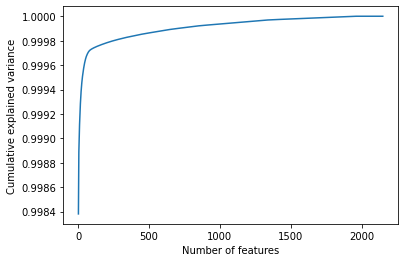

In [41]:
plt.plot(np.arange(1, 2151), np.cumsum(pca_f.explained_variance_ratio_))
plt.xlabel("Number of features")
plt.ylabel("Cumulative explained variance")
plt.show()

Clearly most of the variance is explained with a very small number of features.

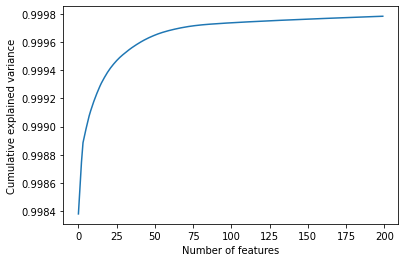

0.9983810902437382


In [42]:
#Examining the first 200 hundred features to see 
plt.plot(np.arange(0, 200), np.cumsum(pca_f.explained_variance_ratio_[:200]))
plt.xlabel("Number of features")
plt.ylabel("Cumulative explained variance")
plt.show()
print(pca_f.explained_variance_ratio_[0])

#### Observations
The very first PCA feature on its own explains 99.8% of the variance. This indicates that the dataset is highy correlated, and has a simple underlying pattern. This corresponds with our earlier observations in part a).

#### Choosing number of components
It appears that increasing the number of PCA features should have a very small effect on the sum explained variance. Therefore, I choose:
- n_components = 1: This should hypothetically give a great result at a very low compute cost.
- n_components = 12: This is right before the inflection point on the cumulative explained variance graph.
- n_components = 75: This is after the end of the inflection point. Returns after this point are expected to be (even more) diminishing.
- n_components = 250: Randomly chosen large value.
- n_components = 2150: Simply take all PCA features.

In [43]:
for numComponents in [1, 12, 75, 250, 2150]:
    print(f"Number of components: {numComponents}")

    #initialise PCA
    pca_f = PCA(n_components=numComponents)

    #clone pre-processed dataset
    df_f = copy.deepcopy(df_e)
    df_test_f = copy.deepcopy(df_test_e)

    #perform PCA
    df_f = pca_f.fit_transform(df_f)
    df_test_f = pca_f.transform(df_test_f)

    #perform linear regression
    regressor_f = LinearRegression(n_jobs=-1)
    regressor_f.fit(df_f, y_train)

    #Generate predictions
    y_train_predictions_f = regressor_f.predict(df_f)
    y_test_predictions_f = regressor_f.predict(df_test_f)

    #Measure performance
    trainR2_f = r2_score(y_train, y_train_predictions_f)
    testR2_f = r2_score(y_test, y_test_predictions_f)
    trainMSE_f = mean_squared_error(y_train, y_train_predictions_f)
    testMSE_f = mean_squared_error(y_test, y_test_predictions_f)
    trainMAE_f = mean_absolute_error(y_train, y_train_predictions_f)
    testMAE_f = mean_absolute_error(y_test, y_test_predictions_f)

    print(f"Train R2 Score: {trainR2_f}")
    print(f"Train Adjusted R2 Score: {adjR2(df_f, trainR2_f)}")
    print(f"Train Mean Squared Error: {trainMSE_f}")
    print(f"Train Root Mean Squared Error: {rmseCalc(df_f, trainMSE_f)}")
    print(f"Train Mean Absolute Error: {trainMAE_f}")
    print()

    print(f"Test R2 Score: {testR2_f}")
    print(f"Test Adjusted R2 Score: {adjR2(df_test_f, testR2_f)}")
    print(f"Test Mean Squared Error: {testMSE_f}")
    print(f"Test Root Mean Squared Error: {rmseCalc(df_test_f, testMSE_f)}") 
    print(f"Test Mean Absolute Error: {testMAE_f}")

    print('-'*32)
    print()



Number of components: 1
Train R2 Score: 0.9999997660657914
Train Adjusted R2 Score: 0.9999997660261819
Train Mean Squared Error: 0.0007942148573246657
Train Root Mean Squared Error: 0.0003666475271445999
Train Mean Absolute Error: 0.016864346113838084

Test R2 Score: 0.9999997600034847
Test Adjusted R2 Score: 0.9999997598407752
Test Mean Squared Error: 0.0008486145250220382
Test Root Mean Squared Error: 0.0007579926297073177
Test Mean Absolute Error: 0.01747108456608699
--------------------------------

Number of components: 12
Train R2 Score: 0.9999999990301851
Train Adjusted R2 Score: 0.9999999990282109
Train Mean Squared Error: 3.2925554842505446e-06
Train Root Mean Squared Error: 2.360729938673402e-05
Train Mean Absolute Error: 0.0013238801524554837

Test R2 Score: 0.9999999989368938
Test Adjusted R2 Score: 0.9999999989281798
Test Mean Squared Error: 3.7590852718454598e-06
Test Root Mean Squared Error: 5.044880008306336e-05
Test Mean Absolute Error: 0.00140502281398501
------------

#### Observations
As expected, we achieve excellent performance with just one feature. Performance on the test dataset improves by tiny margins as we increase the number of features untill n_components=250, but falls a tiny bit at n_components=2150. However, training performance increases monotonously. This indicates that we have probably overfit to the training data by including too many features, and started capturing noise in our model, reducing testing accuracy.

## G

#### Clone dataset from c)

In [44]:
df_g = copy.deepcopy(df_c)
df_test_g = copy.deepcopy(df_test_c)

#### Perform Lasso Regression (Linear regression with L1 regularisation)

In [45]:
regressor_g1 = Lasso()

regressor_g1.fit(df_g, y_train)

Lasso()

#### Perform Lasso Regression (Linear regression with L1 regularisation)

In [46]:
regressor_g2 = Ridge()

regressor_g2.fit(df_g, y_train)

Ridge()

#### Generate predictions

In [47]:
y_train_predictions_g1 = regressor_g1.predict(df_g)
y_test_predictions_g1 = regressor_g1.predict(df_test_g)

In [48]:
y_train_predictions_g2 = regressor_g2.predict(df_g)
y_test_predictions_g2 = regressor_g2.predict(df_test_g)

In [49]:
train_r2Scores_g = []
train_adjR2Scores_g = []
train_MSEs_g = []
train_RMSEs_g = []
train_MAEs_g = []

test_r2Scores_g = []
test_adjR2Scores_g = []
test_MSEs_g = []
test_RMSEs_g = []
test_MAEs_g = []

#### Measure performance: L1

In [50]:
trainR2_g1 = r2_score(y_train, y_train_predictions_g1)
testR2_g1 = r2_score(y_test, y_test_predictions_g1)
trainMSE_g1 = mean_squared_error(y_train, y_train_predictions_g1)
testMSE_g1 = mean_squared_error(y_test, y_test_predictions_g1)
trainMAE_g1 = mean_absolute_error(y_train, y_train_predictions_g1)
testMAE_g1 = mean_absolute_error(y_test, y_test_predictions_g1)

print(f"Train R2 Score: {trainR2_g1}")
print(f"Train Adjusted R2 Score: {adjR2(df_g, trainR2_g1)}")
print(f"Train Mean Squared Error: {trainMSE_g1}")
print(f"Train Root Mean Squared Error: {rmseCalc(df_g, trainMSE_g1)}")
print(f"Train Mean Absolute Error: {trainMAE_g1}")
print()

print(f"Test R2 Score: {testR2_g1}")
print(f"Test Adjusted R2 Score: {adjR2(df_test_g, testR2_g1)}")
print(f"Test Mean Squared Error: {testMSE_g1}")
print(f"Test Root Mean Squared Error: {rmseCalc(df_test_g, testMSE_g1)}") 
print(f"Test Mean Absolute Error: {testMAE_g1}")


train_r2Scores_g.append(trainR2_g1)
train_adjR2Scores_g.append(adjR2(df_g, trainR2_g1))
train_MSEs_g.append(trainMSE_g1)
train_RMSEs_g.append(rmseCalc(df_g, trainMSE_g1))
train_MAEs_g.append(trainMAE_g1)

test_r2Scores_g.append(testR2_g1)
test_adjR2Scores_g.append(adjR2(df_test_g, testR2_g1))
test_MSEs_g.append(testMSE_g1)
test_RMSEs_g.append(rmseCalc(df_test_g, testMSE_g1))
test_MAEs_g.append(testMAE_g1)

Train R2 Score: 0.915882060560236
Train Adjusted R2 Score: 0.9157251241060573
Train Mean Squared Error: 285.58335986892547
Train Root Mean Squared Error: 0.21985999109735563
Train Mean Absolute Error: 11.065033115519245

Test R2 Score: 0.9112250617401447
Test Adjusted R2 Score: 0.9105584922378522
Test Mean Squared Error: 313.9033162419388
Test Root Mean Squared Error: 0.4610071957766453
Test Mean Absolute Error: 11.349114427078211


#### Measure performance: L2

In [51]:
trainR2_g2 = r2_score(y_train, y_train_predictions_g2)
testR2_g2 = r2_score(y_test, y_test_predictions_g2)
trainMSE_g2 = mean_squared_error(y_train, y_train_predictions_g2)
testMSE_g2 = mean_squared_error(y_test, y_test_predictions_g2)
trainMAE_g2 = mean_absolute_error(y_train, y_train_predictions_g2)
testMAE_g2 = mean_absolute_error(y_test, y_test_predictions_g2)

print(f"Train R2 Score: {trainR2_g2}")
print(f"Train Adjusted R2 Score: {adjR2(df_g, trainR2_g2)}")
print(f"Train Mean Squared Error: {trainMSE_g2}")
print(f"Train Root Mean Squared Error: {rmseCalc(df_g, trainMSE_g2)}")
print(f"Train Mean Absolute Error: {trainMAE_g2}")
print()

print(f"Test R2 Score: {testR2_g2}")
print(f"Test Adjusted R2 Score: {adjR2(df_test_g, testR2_g2)}")
print(f"Test Mean Squared Error: {testMSE_g2}")
print(f"Test Root Mean Squared Error: {rmseCalc(df_test_g, testMSE_g2)}") 
print(f"Test Mean Absolute Error: {testMAE_g2}")

train_r2Scores_g.append(trainR2_g2)
train_adjR2Scores_g.append(adjR2(df_g, trainR2_g2))
train_MSEs_g.append(trainMSE_g2)
train_RMSEs_g.append(rmseCalc(df_g, trainMSE_g2))
train_MAEs_g.append(trainMAE_g2)

test_r2Scores_g.append(testR2_g2)
test_adjR2Scores_g.append(adjR2(df_test_g, testR2_g2))
test_MSEs_g.append(testMSE_g2)
test_RMSEs_g.append(rmseCalc(df_test_g, testMSE_g2))
test_MAEs_g.append(testMAE_g2)

Train R2 Score: 0.9169053611874248
Train Adjusted R2 Score: 0.9167503338762073
Train Mean Squared Error: 282.1092182861084
Train Root Mean Squared Error: 0.21851859296540954
Train Mean Absolute Error: 11.024489210541514

Test R2 Score: 0.9121562612171217
Test Adjusted R2 Score: 0.9114966836562945
Test Mean Squared Error: 310.61064592714524
Test Root Mean Squared Error: 0.4585829679291513
Test Mean Absolute Error: 11.360409866184321


In [52]:
results_g = pd.DataFrame()
results_g['regularization'] = ['L1', 'L2']

results_g['train_r2Scores'] = train_r2Scores_g
results_g['train_adjR2Scores'] = train_adjR2Scores_g
results_g['train_MSEs'] = train_MSEs_g
results_g['train_RMSEs'] = train_RMSEs_g
results_g['train_MAEs'] = train_MAEs_g

results_g['test_r2Scores'] = test_r2Scores_g
results_g['test_adjR2Scores'] = test_adjR2Scores_g
results_g['test_MSEs'] = test_MSEs_g
results_g['test_RMSEs'] = test_RMSEs_g
results_g['test_MAEs'] = test_MAEs_g

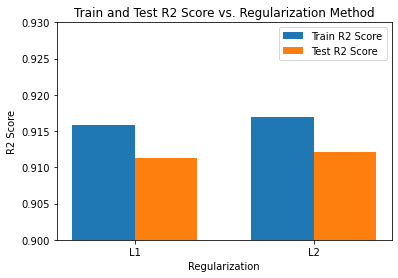

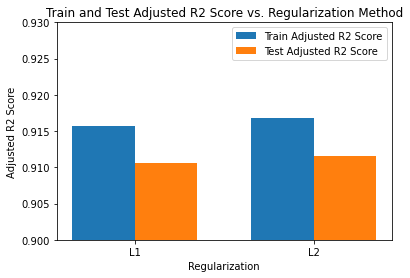

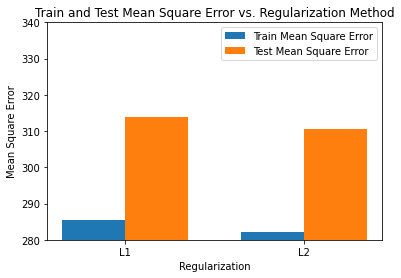

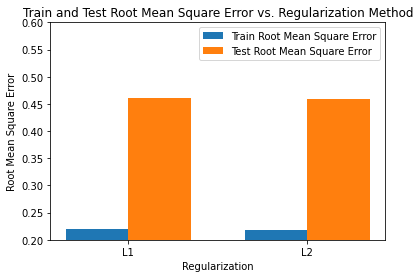

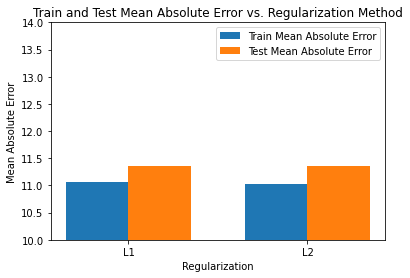

In [53]:
perfMeasures_train = ['train_r2Scores', 'train_adjR2Scores', 'train_MSEs', 'train_RMSEs', 'train_MAEs']
perfMeasures_test = ['test_r2Scores', 'test_adjR2Scores', 'test_MSEs', 'test_RMSEs', 'test_MAEs']
titles = ['R2 Score', 'Adjusted R2 Score', 'Mean Square Error', 'Root Mean Square Error', 'Mean Absolute Error']

for i in range(5):
    # Set the positions of the bars on the x-axis
    x = results_g['regularization']
    bar_width = 0.35

    # Set the index for the x-axis positions
    x_indexes = range(len(x))

    # Create a figure and axis for the bar graph
    fig, ax = plt.subplots()

    # Plot the train R2 scores as bars
    train_bars = ax.bar(range(len(x)), results_g[perfMeasures_train[i]], bar_width, label=f'Train {titles[i]}')

    # Plot the test R2 scores as bars, shifted by 'bar_width' to the right
    test_bars = ax.bar([i + bar_width for i in x_indexes], results_g[perfMeasures_test[i]], bar_width, label=f'Test {titles[i]}')

    # Set labels and title
    if (i<2): ax.set_ylim(0.9, 0.93)
    if (i==2): ax.set_ylim(280, 340)
    if (i==3): ax.set_ylim(0.2, 0.6)
    if (i==4): ax.set_ylim(10, 14)
    ax.set_xlabel('Regularization')
    ax.set_ylabel(f'{titles[i]}')
    ax.set_title(f'Train and Test {titles[i]} vs. Regularization Method')
    ax.set_xticks([i + bar_width / 2 for i in x_indexes])
    ax.set_xticklabels(x)
    ax.legend()

    # Show the plot
    plt.show()

#### Observation
Both methods of regularization seem to perform comparably.

## H

#### Clone dataset

In [54]:
df_h = copy.deepcopy(df_c)
df_test_h = copy.deepcopy(df_test_c)

#### Perform Linear Regression

In [55]:
regressor_h = SGDRegressor() #mse loss + lr = 0.0001 + L2 regularization by default

regressor_h.fit(df_h, y_train)

SGDRegressor()

#### Generate predictions

In [56]:
y_train_predictions_h = regressor_h.predict(df_h)
y_test_predictions_h = regressor_h.predict(df_test_h)

#### Measure performance

In [57]:
trainR2_h = r2_score(y_train, y_train_predictions_h)
testR2_h = r2_score(y_test, y_test_predictions_h)
trainMSE_h = mean_squared_error(y_train, y_train_predictions_h)
testMSE_h = mean_squared_error(y_test, y_test_predictions_h)
trainMAE_h = mean_absolute_error(y_train, y_train_predictions_h)
testMAE_h = mean_absolute_error(y_test, y_test_predictions_h)

print(f"Train R2 Score: {trainR2_h}")
print(f"Train Adjusted R2 Score: {adjR2(df_h, trainR2_h)}")
print(f"Train Mean Squared Error: {trainMSE_h}")
print(f"Train Root Mean Squared Error: {rmseCalc(df_h, trainMSE_h)}")
print(f"Train Mean Absolute Error: {trainMAE_h}")
print()

print(f"Test R2 Score: {testR2_h}")
print(f"Test Adjusted R2 Score: {adjR2(df_test_h, testR2_h)}")
print(f"Test Mean Squared Error: {testMSE_h}")
print(f"Test Root Mean Squared Error: {rmseCalc(df_test_h, testMSE_h)}") 
print(f"Test Mean Absolute Error: {testMAE_h}")

Train R2 Score: 0.916673820525421
Train Adjusted R2 Score: 0.9165183612353565
Train Mean Squared Error: 282.89530696875727
Train Root Mean Squared Error: 0.2188228288548125
Train Mean Absolute Error: 11.120185247068386

Test R2 Score: 0.9120584303101916
Test Adjusted R2 Score: 0.9113981181828279
Test Mean Squared Error: 310.9565706522791
Test Root Mean Squared Error: 0.4588382570605562
Test Mean Absolute Error: 11.452809875140595


#### Observations
Unsurprisingly, it performs more or less the same as Ridge regression.